### Subtask 0 - Importing libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\laune\OneDrive\Desktop\Data Analytics\Full immersion course data analytics\4\E4.2_Laura Asara_04-21 - Instacart Grocery Basket Analysis'

In [3]:
path

'C:\\Users\\laune\\OneDrive\\Desktop\\Data Analytics\\Full immersion course data analytics\\4\\E4.2_Laura Asara_04-21 - Instacart Grocery Basket Analysis'

### Subtask 1 - Importing Data Set from Ex. 4.9

In [4]:
# importing ords_prods_custmrs_merge3 from Ex. 4.9
ords_prods_custmrs_merged = pd.read_csv(os.path.join(path, '4.2 - 02 Data', 'Prepared Data', 'ords_prods_custmrs_merge3.csv'))

### Subtask 2 - Considering Security Implications

In [6]:
# Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis

#### for the purpose of this project the personal data have been modified to not have any relation with real customers, but will address PII to the name and surname column

In [5]:
ords_prods_custmrs_merged.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  order_id  user_id eval_set  \
0           0             0               0   2539329        1    prior   
1           1             1               1   2398795        1    prior   
2           2             2               2    473747        1    prior   
3           3             3               3   2254736        1    prior   
4           4             4               4    431534        1    prior   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  ...  \
0             1          2                  8                     NaN  ...   
1             2          3                  7                    15.0  ...   
2             3          3                 12                    21.0  ...   
3             4          4                  7                    29.0  ...   
4             5          4                 15                    28.0  ...   

   mean_days_since_prior_order  first_name  surname  Gender    state age  \
0                    20.259259       Linda   Nguyen  Female  Alabama  31   
1                    20.259259       Linda   Nguyen  Female  Alabama  31   
2                    20.259259       Linda   Nguyen  Female  Alabama  31   
3                    20.259259       Linda   Nguyen  Female  Alabama  31   
4                    20.259259       Linda   Nguyen  Female  Alabama  31   

   date_joined  n_dependants  fam_status  income  
0    2/17/2019             3     married   40423  
1    2/17/2019             3     married   40423  
2    2/17/2019             3     married   40423  
3    2/17/2019             3     married   40423  
4    2/17/2019             3     married   40423  

[5 rows x 32 columns]

In [6]:
# dropping extra columns
ords_prods_custmrs_merged = ords_prods_custmrs_merged.drop(columns = ['eval_set', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])

In [7]:
# dropping sensitive data 'surname' and 'first_name'
ords_prods_custmrs_merged = ords_prods_custmrs_merged.drop(columns = ['surname', 'first_name'])

In [8]:
# checking results after dropping
ords_prods_custmrs_merged.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered _merge  \
0                     NaN         196                  1          0   both   
1                    15.0         196                  1          1   both   
2                    21.0         196                  1          1   both   
3                    29.0         196                  1          1   both   
4                    28.0         196                  1          1   both   

   ...           loyalty_flag mean_order  mean_days_since_prior_order  Gender  \
0  ...  Non-frequent customer   6.367797                    20.259259  Female   
1  ...  Non-frequent customer   6.367797                    20.259259  Female   
2  ...  Non-frequent customer   6.367797                    20.259259  Female   
3  ...  Non-frequent customer   6.367797                    20.259259  Female   
4  ...  Non-frequent customer   6.367797                    20.259259  Female   

     state  age date_joined  n_dependants  fam_status income  
0  Alabama   31   2/17/2019             3     married  40423  
1  Alabama   31   2/17/2019             3     married  40423  
2  Alabama   31   2/17/2019             3     married  40423  
3  Alabama   31   2/17/2019             3     married  40423  
4  Alabama   31   2/17/2019             3     married  40423  

[5 rows x 26 columns]

### Subtask 3 - Creating regional segmentation of data

In [9]:
# create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set
ords_prods_custmrs_merged['state'].value_counts(dropna= False)

Pennsylvania            667710
California              660447
Rhode Island            657655
Georgia                 657072
New Mexico              655143
Arizona                 654545
North Carolina          652338
Oklahoma                652263
Alaska                  649020
Minnesota               648408
Massachusetts           647000
Wyoming                 644929
Virginia                642075
Missouri                641313
Texas                   641058
Colorado                639752
Maine                   639149
North Dakota            638999
Alabama                 638617
Louisiana               638174
Kansas                  637991
Delaware                637447
South Carolina          637348
Oregon                  636949
Arkansas                636706
Nevada                  636697
New York                636697
Montana                 635835
South Dakota            634340
Illinois                633490
Hawaii                  633445
Washington              633421
Mississi

In [10]:
# define a function for the region
region = []
for value in ords_prods_custmrs_merged['state']:
    if (value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value== 'Pennsylvania' or value == 'New Jersey'):
        region.append('Northeast')
    elif (value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri'):
        region.append('Midwest')
    elif (value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana'):
        region.append("South")
    elif (value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value== 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value== 'Hawaii'):
        region.append("West")
    else:
        region.append('Not defined')

In [11]:
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [12]:
# creating label for new column
ords_prods_custmrs_merged['us_region']= region

In [13]:
# checking us_region results
ords_prods_custmrs_merged['us_region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: us_region, dtype: int64

In [14]:
# determine whether there’s a difference in spending habits between the different U.S. regions
ords_prods_custmrs_merged.groupby(['us_region']).agg({'order_number':['sum']})

order_number
                   sum
us_region             
Midwest      128692591
Northeast     98617491
South        185248791
West         143425956

In [15]:
# determine whether there’s a difference in spending habits between the different U.S. regions
ords_prods_custmrs_merged.groupby(['us_region']).agg({'prices':['sum']})

prices
                    sum
us_region              
Midwest    9.668811e+07
Northeast  6.619906e+07
South      1.317394e+08
West       9.397244e+07

In [16]:
ords_prods_custmrs_merged['mean_order'].value_counts()

7.700000     4127
7.154658     3725
6.684799     3638
7.800000     3445
7.400000     3375
             ... 
11.933333       3
2.866667        3
1.566667        3
12.200000       3
2.933333        3
Name: mean_order, Length: 160090, dtype: int64

<AxesSubplot:>

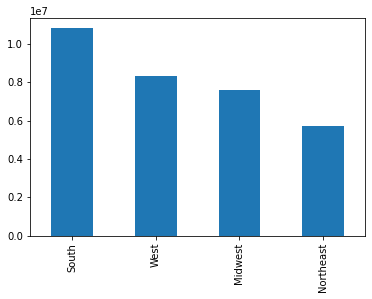

In [17]:
ords_prods_custmrs_merged['us_region'].value_counts().plot.bar()

#### the us_region 'South' has the highest number of orders and spending

### Subtask 4 - Creating exclusion flag for low activity customers

In [18]:
# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
# define customer activity
ords_prods_custmrs_merged['customer_activity'] = ords_prods_custmrs_merged.groupby(['user_id'])['order_number'].transform('max')

In [19]:
# low activity
ords_prods_custmrs_merged.loc[ords_prods_custmrs_merged['customer_activity'] < 5, 'activity_flag'] = 'low activity'

In [20]:
# medium activity
ords_prods_custmrs_merged.loc[(ords_prods_custmrs_merged['customer_activity'] >= 5) & (ords_prods_custmrs_merged['customer_activity'] < 15), 'activity_flag'] = 'medium activity'

In [21]:
# high activity
ords_prods_custmrs_merged.loc[ords_prods_custmrs_merged['customer_activity'] >= 15, 'activity_flag'] = 'high activity'

In [22]:
# checking customer_activity results
ords_prods_custmrs_merged['activity_flag'].value_counts(dropna= False)

high activity      23197950
medium activity     7794714
low activity        1441548
Name: activity_flag, dtype: int64

In [23]:
# export customers with low activity
low_activity = ords_prods_custmrs_merged.copy()

In [24]:
low_activity = low_activity[low_activity.customer_activity < 5]

In [25]:
# checking low activity results
low_activity.shape

(1441548, 29)

In [26]:
low_activity['activity_flag'].value_counts(dropna= False)

low activity    1441548
Name: activity_flag, dtype: int64

In [27]:
# save low customer activities 
low_activity.to_csv(os.path.join(path, '4.2 - 02 Data', 'Prepared Data', 'ords_prods_custmrs_merge_low_act.csv'))

In [28]:
# remove low customer_activity from ords_prods_custmrs_merged
ords_prods_custmrs_merged = ords_prods_custmrs_merged[ords_prods_custmrs_merged.customer_activity >=5]

In [29]:
# checking low activity results
ords_prods_custmrs_merged['activity_flag'].value_counts(dropna= False)

high activity      23197950
medium activity     7794714
Name: activity_flag, dtype: int64

### Subtask 5 - Creating profiling variables based on age, income, nr_dependants and department_id

In [30]:
# define fam_range function
def fam_range(row):
    if row['n_dependants'] == 0:
        return 'single'
    elif (row['n_dependants'] > 0) and (row['n_dependants'] <= 4):
        return 'family'
    elif row ['n_dependants'] > 4:
        return 'big_family'
    else: return np.nan

In [31]:
# apply the fam_range function
ords_prods_custmrs_merged['fam_range'] = ords_prods_custmrs_merged.apply(fam_range, axis = 1)

In [32]:
ords_prods_custmrs_merged['fam_range'].value_counts(dropna = False)

family    23245632
single     7747032
Name: fam_range, dtype: int64

In [33]:
# define age_range function
def age_range(row):
    if (row['age'] >= 18) and (row['age'] <= 35):
        return 'young'
    elif (row['age'] > 35) and (row['age'] <= 65):
        return 'adult'
    elif row ['age'] > 65:
        return 'mature'
    else: return np.nan

In [34]:
ords_prods_custmrs_merged['age_range'] = ords_prods_custmrs_merged.apply(age_range, axis = 1)

In [35]:
ords_prods_custmrs_merged['age_range'].value_counts(dropna = False)

adult     14508266
young      8746779
mature     7737619
Name: age_range, dtype: int64

In [36]:
# define income_range function
def income_range(row):
    if (row['income'] <= 60000):
        return 'low_income'
    elif (row['income'] > 60000) and (row['income'] <= 120000):
        return 'med_income'
    elif row ['income'] > 120000:
        return 'high_income'
    else: return np.nan

In [37]:
ords_prods_custmrs_merged['income_range'] = ords_prods_custmrs_merged.apply(income_range, axis = 1)

In [38]:
ords_prods_custmrs_merged['income_range'].value_counts(dropna = False)

med_income     15996246
high_income     9187363
low_income      5809055
Name: income_range, dtype: int64

In [39]:
ords_prods_custmrs_merged['department_id'].describe

<bound method NDFrame.describe of 0           7
1           7
2           7
3           7
4           7
           ..
32434203    7
32434204    7
32434205    7
32434206    7
32434207    7
Name: department_id, Length: 30992664, dtype: int64>

In [40]:
# define beverage_flag function
def beverage_flag(row):
    if row['department_id'] == 5:
        return 'alc_beverage'
    if row['department_id'] == 7:
        return 'soft_beverage'
    else: return 'no_beverage'

In [42]:
ords_prods_custmrs_merged['beverage_flag'] = ords_prods_custmrs_merged.apply(beverage_flag, axis = 1)

In [43]:
ords_prods_custmrs_merged['beverage_flag'].value_counts(dropna= False)

no_beverage      28276056
soft_beverage     2571934
alc_beverage       144674
Name: beverage_flag, dtype: int64

In [44]:
ords_prods_custmrs_merged.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered _merge  \
0                     NaN         196                  1          0   both   
1                    15.0         196                  1          1   both   
2                    21.0         196                  1          1   both   
3                    29.0         196                  1          1   both   
4                    28.0         196                  1          1   both   

   ...  n_dependants fam_status  income  us_region  customer_activity  \
0  ...             3    married   40423      South                 10   
1  ...             3    married   40423      South                 10   
2  ...             3    married   40423      South                 10   
3  ...             3    married   40423      South                 10   
4  ...             3    married   40423      South                 10   

     activity_flag fam_range  age_range  income_range  beverage_flag  
0  medium activity    family      young    low_income  soft_beverage  
1  medium activity    family      young    low_income  soft_beverage  
2  medium activity    family      young    low_income  soft_beverage  
3  medium activity    family      young    low_income  soft_beverage  
4  medium activity    family      young    low_income  soft_beverage  

[5 rows x 33 columns]

### Subtask 6 - Creating visualization for new profiles

<AxesSubplot:>

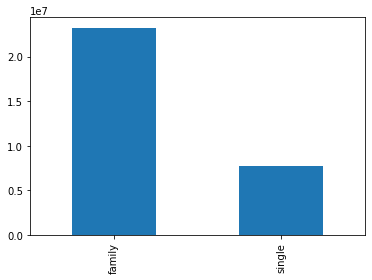

In [46]:
# create a visualization of family composition
ords_prods_custmrs_merged['fam_range'].value_counts().plot.bar()

<AxesSubplot:>

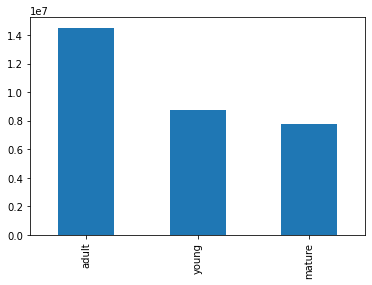

In [47]:
# create a visualization of age range
ords_prods_custmrs_merged['age_range'].value_counts().plot.bar()

<AxesSubplot:>

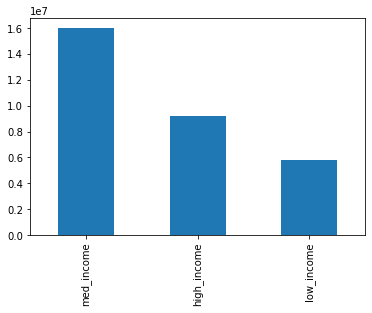

In [48]:
# create a visualization of age range
ords_prods_custmrs_merged['income_range'].value_counts().plot.bar()

<AxesSubplot:>

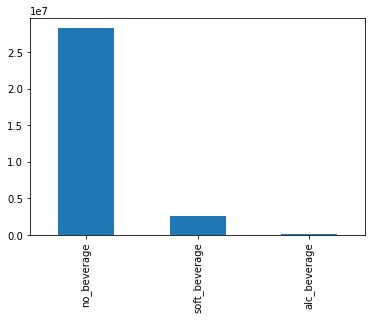

In [45]:
# create a visualization of the beverage consumption
ords_prods_custmrs_merged['beverage_flag'].value_counts().plot.bar()

### Subtask 7 - Aggregating mean, min, max for new profiles

In [50]:
# aggregate the max, min, mean for fam_range
ords_prods_custmrs_merged.groupby('fam_range').agg({'income':['mean', 'min', 'max']})

income               
                   mean    min     max
fam_range                             
family     99599.122688  25911  593901
single     99895.555355  25903  584097

In [51]:
# aggregate the max, min, mean for age_range
ords_prods_custmrs_merged.groupby('age_range').agg({'income':['mean', 'min', 'max']})

income               
                    mean    min     max
age_range                              
adult      108579.601261  25903  592409
mature     115797.036966  29001  593901
young       70636.691160  25911  396364

In [54]:
# aggregate the max, min, mean for income_range
ords_prods_custmrs_merged.groupby('income_range').agg({'prices':['mean', 'min', 'max']})

prices              
                   mean  min      max
income_range                         
high_income   20.041344  1.0  99999.0
low_income     7.096536  1.0  14900.0
med_income     9.035258  1.0  99999.0

In [56]:
# aggregate the max, min, mean for income_range
ords_prods_custmrs_merged.groupby('income_range').agg({'customer_activity':['mean', 'min', 'max']})

customer_activity        
                          mean min max
income_range                          
high_income          34.622819   5  99
low_income           33.232803   5  99
med_income           34.745561   5  99

In [53]:
# aggregate the max, min, mean for beverage_flag
ords_prods_custmrs_merged.groupby('beverage_flag').agg({'prices':['mean', 'min', 'max']})

prices              
                    mean  min      max
beverage_flag                         
alc_beverage    8.151446  1.0     15.0
no_beverage    12.340582  1.0  99999.0
soft_beverage   7.682624  1.0     15.0

### Subtask 8 - Comparing new profiles with regions and departments

In [108]:
# compare mean_income among us_region
income_region_profile = ords_prods_custmrs_merged.groupby('us_region').agg({'income':['mean']})

In [87]:
income_region_profile

income
                    mean
us_region               
Midwest    100378.166715
Northeast   99744.004318
South       99239.179617
West        99543.274427

In [111]:
# crosstab income_region
crosstab_income_region=pd.crosstab(ords_prods_custmrs_merged['us_region'],ords_prods_custmrs_merged['income_range'], dropna=False )
crosstab_income_region

income_range  high_income  low_income  med_income
us_region                                        
Midwest           2190667     1342352     3734688
Northeast         1630519     1021145     2818404
South             3025895     1968686     5325881
West              2340282     1476872     4117273

In [88]:
# compare income mean among fam_range
income_family_profile = ords_prods_custmrs_merged.groupby('fam_range').agg({'income':['mean']})

In [91]:
income_family_profile

income
                   mean
fam_range              
family     99599.122688
single     99895.555355

In [93]:
# beverage region profile
beverage_region_profile = ords_prods_custmrs_merged.groupby(['beverage_flag','us_region']).agg({'prices':['mean']})

In [101]:
beverage_region_profile

prices
                              mean
beverage_flag us_region           
alc_beverage  Midwest     8.132588
              Northeast   8.050052
              South       8.179028
              West        8.201325
no_beverage   Midwest    13.156609
              Northeast  11.920070
              South      12.544494
              West       11.617766
soft_beverage Midwest     7.685251
              Northeast   7.685703
              South       7.690308
              West        7.667864

In [105]:
# crosstab beverage_region
crosstab_beverage_region_profile = pd.crosstab(ords_prods_custmrs_merged['us_region'],ords_prods_custmrs_merged['beverage_flag'], dropna=False )
crosstab_beverage_region_profile

beverage_flag  alc_beverage  no_beverage  soft_beverage
us_region                                              
Midwest               34052      6634665         598990
Northeast             25034      4982103         462931
South                 48822      9412205         859435
West                  36766      7247083         650578

In [114]:
# crosstab age_region
crosstab_age_region_profile = pd.crosstab(ords_prods_custmrs_merged['us_region'],ords_prods_custmrs_merged['age_range'], dropna=False )
crosstab_age_region_profile

age_range    adult   mature    young
us_region                           
Midwest    3446542  1800968  2020197
Northeast  2521117  1395878  1553073
South      4816090  2551237  2953135
West       3724517  1989536  2220374

In [117]:
# crosstab fam_region
crosstab_fam_region_profile = pd.crosstab(ords_prods_custmrs_merged['us_region'],ords_prods_custmrs_merged['fam_range'], dropna=False )
crosstab_fam_region_profile

fam_range   family   single
us_region                  
Midwest    5443220  1824487
Northeast  4114240  1355828
South      7736110  2584352
West       5952062  1982365

### Subtask 9 - Producing charts to illustrate reuslts

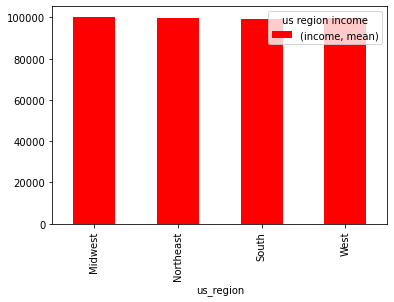

In [131]:
# visualization of difference in income based on us_regions
income_region_profile = income_region_profile.plot.bar(color=['red'])
plt.legend(title='us region income')

#### Midwest has a slightly higher income mean than the others us regions

In [132]:
# saving chart
income_region_profile.figure.savefig(os.path.join(path, '4.2 - 04 Analysis', '4.10 income_region_profile.png'))

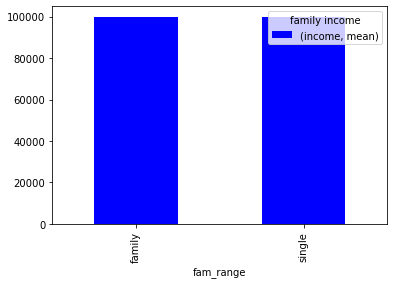

In [133]:
# visualization of difference in income based on fam_range
income_family_profile = income_family_profile.plot.bar(color=['blue'])
plt.legend(title='family income')

#### there is almost no difference in the income between family and single 

In [134]:
# saving chart
income_family_profile.figure.savefig(os.path.join(path, '4.2 - 04 Analysis', '4.10 income_family_profile.png'))

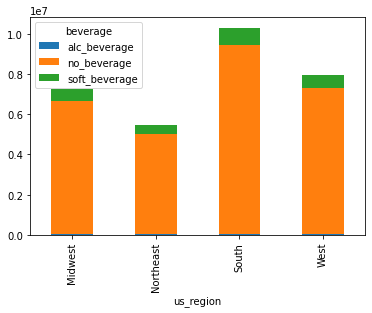

In [135]:
# visualization of difference in beverage cons. based on us_region
crosstab_beverage_region_profile = crosstab_beverage_region_profile.plot.bar(stacked= True)
plt.legend(title='beverage')

In [136]:
# saving chart
crosstab_beverage_region_profile.figure.savefig(os.path.join(path, '4.2 - 04 Analysis', '4.10 beverage_region_profile.png'))

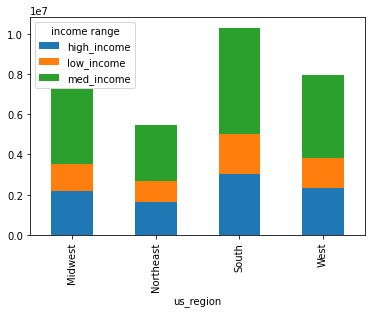

In [137]:
# visualization of difference in income_range based on us_region
crosstab_income_region = crosstab_income_region.plot.bar(stacked= True)
plt.legend(title='income range')

In [138]:
# saving chart
crosstab_income_region.figure.savefig(os.path.join(path, '4.2 - 04 Analysis', '4.10 income_region.png'))

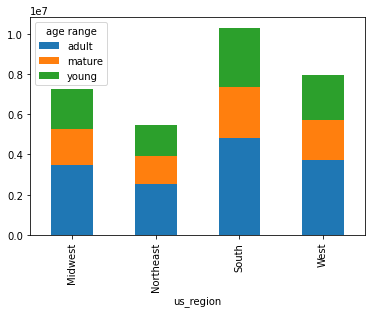

In [139]:
# visualization of difference in age_range based on us_region
crosstab_age_region_profile = crosstab_age_region_profile.plot.bar(stacked= True)
plt.legend(title='age range')

In [140]:
# saving chart
crosstab_age_region_profile.figure.savefig(os.path.join(path, '4.2 - 04 Analysis', '4.10 age_region.png'))

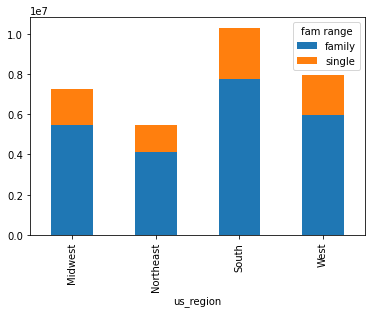

In [141]:
# visualization of difference in fam_range based on us_region
crosstab_fam_region_profile = crosstab_fam_region_profile.plot.bar(stacked= True)
plt.legend(title='fam range')

In [142]:
# saving chart
crosstab_fam_region_profile.figure.savefig(os.path.join(path, '4.2 - 04 Analysis', '4.10 fam_region.png'))

In [143]:
ords_prods_custmrs_merged.to_csv(os.path.join(path, '4.2 - 02 Data','Prepared Data', 'ords_prods_custmrs_merge4.csv'))